# GRU

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('aggregate_data_daily.csv')
df1 = df['close']
df1

0       131288.958237
1       131832.877280
2       129468.922827
3       129249.723173
4       127985.717387
            ...      
1764    257670.968933
1765    259022.745291
1766    258462.879837
1767    259788.447905
1768    260920.830000
Name: close, Length: 1769, dtype: float64

In [3]:
df1_max = max(df['close'])
df1_min = min(df['close'])

# Data Preprocessing

In [4]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
training_size=int(len(df1)*0.8694177501413228)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [6]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Train/Test Split

In [7]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_train2, y_train2 = X_train, y_train
X_test, y_test = create_dataset(test_data, time_step)
X_test2, y_test2 = X_test, y_test

In [8]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [9]:
X_train.shape[1]

100

# Model

In [10]:
# create and fit the GRU network
model = Sequential()
model.add(GRU(50, activation = 'relu', return_sequences = True,  input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-traina

In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
23/23 [==============================] - 6s 90ms/step - loss: 0.0045
Epoch 2/20
23/23 [==============================] - 2s 92ms/step - loss: 0.0198
Epoch 3/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0021
Epoch 4/20
23/23 [==============================] - 2s 92ms/step - loss: 0.0033
Epoch 5/20
23/23 [==============================] - 2s 92ms/step - loss: 0.0015
Epoch 6/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0029
Epoch 7/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0025
Epoch 8/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0069
Epoch 9/20
23/23 [==============================] - 2s 92ms/step - loss: 0.0068
Epoch 10/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0103
Epoch 11/20
23/23 [==============================] - 2s 92ms/step - loss: 0.0023
Epoch 12/20
23/23 [==============================] - 2s 91ms/step - loss: 0.0013
Epoch 13/20
23/23 [==================

# Prediction

In [13]:
test_predict = model.predict(X_test)

5/5 [==============================] - 1s 17ms/step


In [14]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.0011580979901309942
R2 0.7849227798093538


In [15]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

45/45 [==============================] - 1s 18ms/step


In [16]:
train_predict

array([[139138.75],
       [139660.95],
       [139957.84],
       ...,
       [270559.12],
       [271247.38],
       [271585.03]], dtype=float32)

In [17]:
y_test2 = (y_test * (df1_max - df1_min)) + df1_min
y_test2

array([250990.87173333, 252383.4773842 , 257239.8016    , 259817.70643432,
       258414.35147849, 258248.80712329, 258948.98482385, 259795.67562674,
       257272.32018717, 257450.47179487, 253149.91147541, 255616.87613333,
       254892.62043597, 251723.23077957, 254792.68016997, 252332.78756684,
       253962.28968927, 255839.57866848, 251508.9228    , 248868.17144772,
       246473.07797297, 239157.38293333, 236735.6       , 237949.88310992,
       235004.6094086 , 230609.33404826, 232405.67735849, 230783.83672087,
       233148.66852861, 236140.60613333, 231000.73696237, 234802.57743243,
       237334.0092246 , 234764.85502717, 233221.25528455, 232239.80569106,
       236877.87105263, 241390.27589041, 241909.95923913, 240486.86260054,
       239169.80094851, 238268.8152815 , 234924.30512129, 232116.63203753,
       232497.6596    , 231859.98773585, 230983.70482574, 226703.83096515,
       227020.89663979, 227087.04301075, 225304.62198391, 220748.5188    ,
       227964.4       , 2

In [18]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')

MSE 33390699.24532045
R2 0.7849226389283521


In [19]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

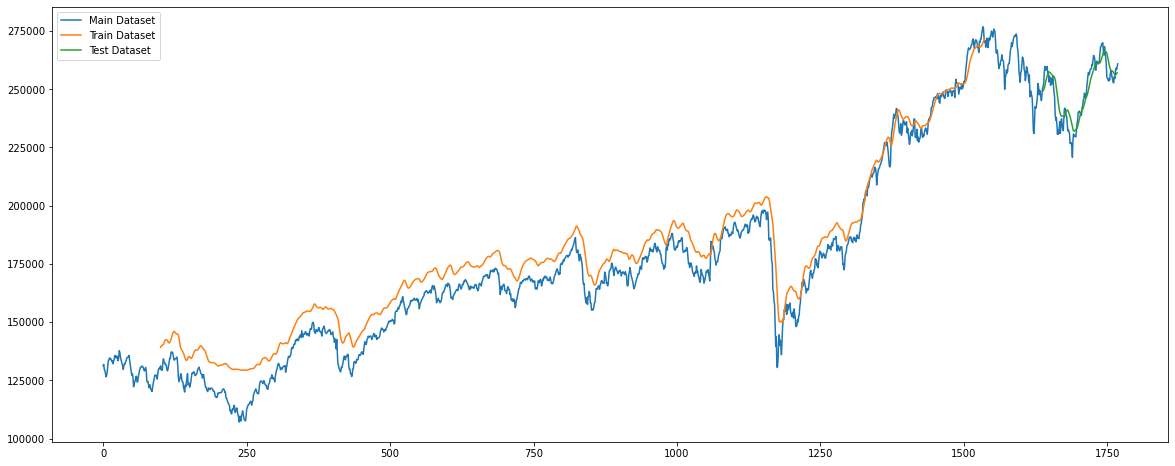

In [20]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()